In [4]:
ion1 = -2
ion2 = 3
nions = 13
nseg = 25
file_suffix = "v1"

# Optimizer settings
pitime = 8  # us, corresponds to max rabi frequency per base function
τmin = 5    # min segment length in us
τmax = 15   # max segment length in us
maxtime = 10  # max seconds to run optimization
min_mode_index = 1  # lower bound for detune during gate 
max_mode_index = 2  # max bound for detune during gate 
params_file = "../system_params/072125_goldparams_13ions.json"
println("Gate time between $(τmin * nseg) and $(τmax * nseg) μs")
println("Lower bound on pi time required: $(pitime/cld(nseg+1, 2)) μs")

Gate time between 125 and 375 μs
Lower bound on pi time required: 0.6153846153846154 μs


In [5]:
using GoldGates
using MSSim: Optimizers as Opts, SegSeq as SS, SymLinear as SL, Sequence as Seq, Utils as U
using NLopt
using Statistics
using PyPlot
using JSON
using Dates

include("../src/utils.jl")
ENV["MPLBACKEND"] = "module://matplotlib_inline.backend_inline"

sysparams = open(params_file) do io
    read(io, GoldGates.SystemParams; format=:json)
end

modes = setup_modes(sysparams, ion1, ion2, nions)
nlmodel = setup_model(nseg, modes)
opt, tracker = setup_optimizer(nlmodel, sysparams; pitime, τmin, τmax, maxtime, min_mode_index, max_mode_index)

date = Dates.format(Dates.now(), "yyyymmdd")
out_file = "../out/$(date)_am_$(nions)_$(file_suffix).json"
println("Results will be saved to $out_file")

best_params, best_obj = run_optimization!(opt, tracker, nlmodel)

Results will be saved to ../out/20260205_am_13_v1.json
(obj = 246.74011002723395, dis = 0.0, disδ = 0.0, area = 0.0, areaε = -1.5707963267948966, areaδ = 0.0, total_t = 127.49453836770361, Ωmax = 0.0)
(obj = 0.0433614498460139, dis = 0.000180145248831048, disδ = 4.24566572638244, area = -1.5706582890311118, areaε = -0.00013803776378473742, areaδ = -14.699985072078713, total_t = 229.30340760184004, Ωmax = 0.0005669050279302827)
(obj = 0.0009596543618263965, dis = 4.1062671307696115e-7, disδ = 0.09532183128419015, area = -1.5707932589522786, areaε = -3.0678426179431284e-6, areaδ = -20.933165678600425, total_t = 333.2230370563566, Ωmax = 4.5838248072778e-5)
(obj = 0.00035510476468032337, dis = 1.6166681675137168e-7, disδ = 0.03522934374774607, area = -1.5707951896607306, areaε = -1.1371341659405232e-6, areaδ = -14.152257105121631, total_t = 291.80986712415, Ωmax = 0.0)
(obj = 2.1634160741576167e-5, dis = 8.481495864015896e-9, disδ = 0.001982915216369152, area = -1.5707962524654762, areaε 

([13.140236576161646, 0.0, 0.004104183033547329, 0.011681314576648557, 0.02179606836283336, 0.03162216228135458, 0.04351753251188074, 0.054794703314314915, 0.06713405708218809, 0.07418295240424168, 0.07443491264627664, 0.06394140363477127, 0.045228041709437, 0.02188752980951879, 14.25876225562369], 2.1634160741576167e-5)

{
    "pitime": 8,
    "displacement_at_-1kHz": 0.014641573366896534,
    "total_gate_time": 328.50591440404116,
    "τmin": 5,
    "max_mode_index": 2,
    "gradient_displacement_detuning": 0.0019829152195836907,
    "enclosed_area": -1.5707962524660082,
    "τmax": 15,
    "min_mode_index": 1,
    "carrier_pi_time_required": 3.0540937154387424,
    "total_displacement": 8.481496191910974e-9,
    "displacement_at_+1kHz": 0.006129693356551666,
    "gradient_area_detuning": -13.276296720410846,
    "total_cumulative_displacement": 0.001982915233813049,
    "opt_params": [
        13.140236576161646,
        0.0,
        0.004104183033547329,
        0.011681314576648557,
        0.02179606836283336,
        0.03162216228135458,
        0.04351753251188074,
        0.054794703314314915,
        0.06713405708218809,
        0.07418295240424168,
        0.07443491264627664,
        0.06394140363477127,
        0.045228041709437,
        0.02188752980951879,
        14.25876225562369
    ],

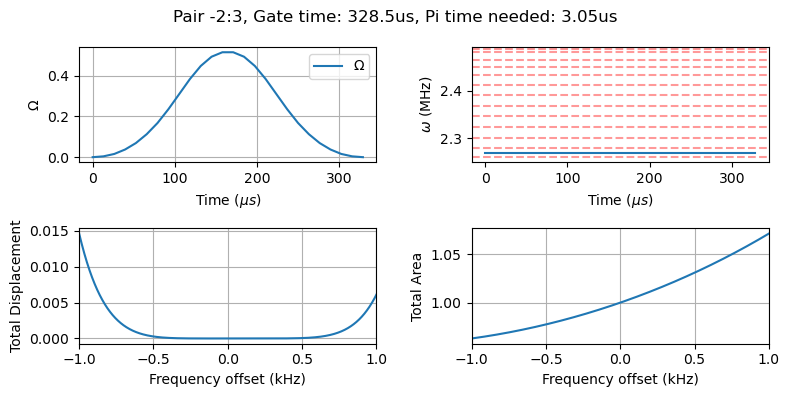

In [6]:
# === Review results & save ===
opt_raw_params, metadata = get_metadata_and_plot(nlmodel, best_params, nseg, sysparams, modes;
    ion1, ion2, pitime, τmin, τmax, maxtime, min_mode_index, max_mode_index)
println(JSON.json(metadata, 4))
save_am_solution(out_file, opt_raw_params, metadata, sysparams, ion1, ion2)